# ДЗ 4 Оцениваемое

## Задание 1

Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import os
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [3]:
punctuation += '\n'

In [4]:
punctuation += '«'

In [5]:
punctuation += '»'

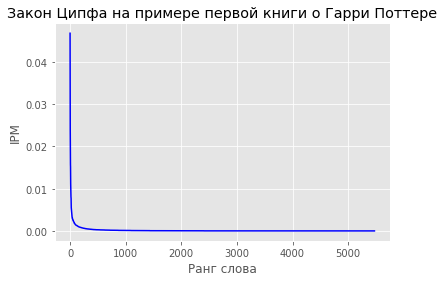

In [7]:
with open ('harrylem.txt', 'w+', encoding='utf-8') as hl: 
    with open ('Harry_Potter_and_the_Sorcerers_Stone.txt', 'r+', encoding='utf-8') as orig: 
        harryread = orig.read()
        harry1 = harryread.split( )
        harry1 = str(harry1)
        harry1 = harry1.split('—') #Пытаюсь так убрать тире между словами. Это работает! 
        harrystr = str(harry1)
        harry2 = ''
        for i in harrystr: 
            i = i.lower() #Привожу все слова к нижнему регистру
            i = str(i.strip(punctuation)) #Отрезаю пунктуацию
            harry2 += i
        wnl = WordNetLemmatizer()
        lemmas = ''
        for word in word_tokenize(harry2): #Токенизирую перед лемматизацией (буду лемматизировать циклом по каждму слову из текста)
            lem = wnl.lemmatize(word) #Лемматизирую по слову циклом
            lemmas += str(lem) #Каждую лемму перевожу в формат str и записываю в созданную ранее пустую строку lemmas
            lemmas += ' ' #Добавляю пробел после каждой леммы
        hl.write(lemmas) #Записываю строковую переменную с леммами в файл harrylem.txt
        dictio = {}
        lemlist = list(lemmas.split( ))
        for l in lemlist: 
            x = lemlist.count(l)
            dictio.update({l:x}) #Вношу результаты подсчета в словарь
        dsorted = sorted(dictio.items(), key=lambda x: x[1], reverse=True) #Сортирую словарь
        xx = [] #Список точек для оси X
        yy = [] #Список точек для оси Y
        p = 0 
        for el in dsorted:
            p += 1
            xx.append(p) #Считаю ранг и добавляю его в список точек для оси X
            yy.append(el[1] / len(lemlist)) #Считаю IPM и добавляю его в список точек для оси Y
        style.use('ggplot') #Использую стиль ggplot
        plt.plot(xx, yy, c = 'blue') #Строю график
        plt.title('Закон Ципфа на примере первой книги о Гарри Поттере')
        plt.ylabel('IPM')
        plt.xlabel('Ранг слова')
        plt.show()

Очистите текст от стоп-слов. 

In [17]:
sw = stopwords.words('english')
filterharry = [z for z in word_tokenize(harry2) if z not in sw] #Убираю стоп-слова

Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [35]:
tx = [] #Список точек для оси X
ty = [] #Список точек для оси Y
filterdict = {}
for zz in filterharry: 
    kolvo = filterharry.count(zz) #Считаю количество каждого из слов
    filterdict.update({zz:kolvo}) #Добавляю слово и количество его употреблений в словарь
newdict = sorted(filterdict.items(), key=lambda x: x[1], reverse=True) #Сортирую словарь 
oxw = [] #Список подписей для оси Х
kv = 0
for nd in newdict[:30]:
    kv += 1
    tx.append(kv)
    ty.append(newdict.count(nd[0]))
    oxw.append(nd[0])

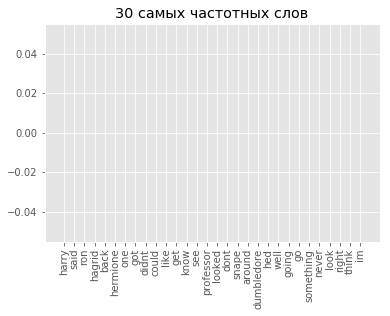

In [36]:
style.use('ggplot')
plt.bar(tx, ty)
plt.title('30 самых частотных слов')
plt.xticks(tx, oxword, rotation=90)
plt.show() #Вывожу график, и вижу, что со значениями по Oy беда